In [10]:
using Distributions, StatsBase, Random, Plots, Base.Threads, DifferentialEquations

In [2]:
nthreads()

5

In [3]:
Random.seed!(123);

In [4]:
dist = Uniform()

Uniform{Float64}(a=0.0, b=1.0)

**Warm Up:** Plots

In [14]:
function ecdf_plot1(dist,itr,samp)
    v = [[rand(dist, itr) for i in 1:itr] for j in 1:samp]
    pl = plot(x -> cdf.(dist, x), -0.05, 1.05, title = "Empirical Uniform CDF", linewidth = 5, label="Original CDF", xlabel = "x", ylabel = "CDF", xrange = [-0.1,1.1], fmt=:png)
    for i in 1:samp
        norm_ecdf = ecdf(v[i][1])
        plot!(x -> norm_ecdf(x), -0.05, 1.05, legend=false)
    end
    display(pl)
end

ecdf_plot1 (generic function with 1 method)

In [15]:
function ecdf_plot2(dist,itr,samp)
    v = [[rand(dist, itr) for i in 1:itr] for j in 1:samp]
    pl2 = plot(fmt=:png)
    for i in 1:samp
        norm_ecdf = ecdf(v[i][1])
        plot!(x -> norm_ecdf(x) - cdf.(dist,x), -0.05, 1.05, legend=false, yrange=[-1 1])
    end
    display(pl2)
end

ecdf_plot2 (generic function with 1 method)

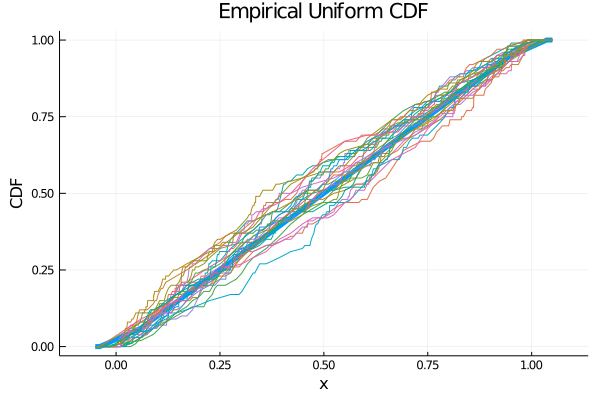

In [51]:
ecdf_plot1(Uniform(),100,25)

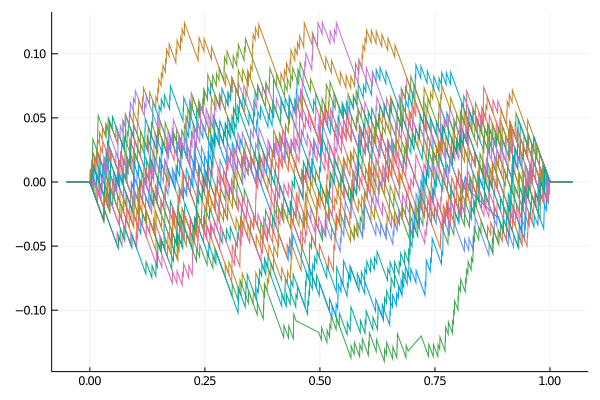

In [52]:
ecdf_plot2(Uniform(),100,25)

In [34]:
BB = BrownianBridge(0.0, 1.0, 0.0, 0.0)
prob = NoiseProblem(BB,(0.0,1.0))

NoiseProblem with WType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)


In [40]:
function brown_plot1(samp)
    pl3 = plot(fmt=:png)
    for i = 1:samp
        sol = DifferentialEquations.solve(prob;dt=0.001)
        plot!(sol.t,sol.u,fmt=:png,legend=false)
    end
    display(pl3)
end

brown_plot1 (generic function with 1 method)

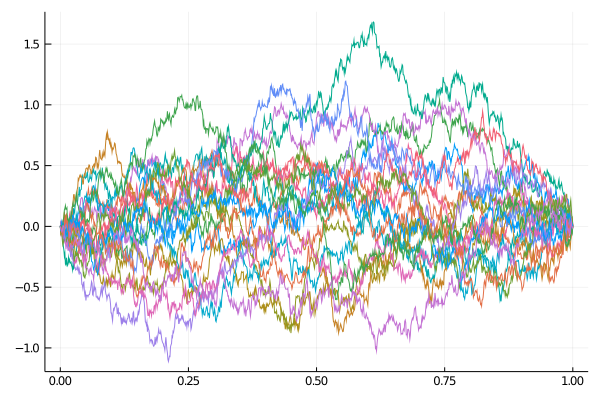

In [43]:
brown_plot1(20)

**Investigation:** Looking at the maximum of supremum.

In [67]:
function num_maximum(f,lend,rend;res=1e-3)
    x = lend:res:rend
    f_arr = f.(x)
    return findmax(f_arr)[1]
end

num_maximum (generic function with 1 method)

In [80]:
function ecdf_max_dist(dist,itr,samp)
    v = [[rand(dist, itr) for i in 1:itr] for j in 1:samp]
    pl2 = plot(fmt=:png)
    maxval = Array{Float64}(undef,samp)
    for i in 1:samp
        norm_ecdf = ecdf(v[i][1])
        f(x) = abs(norm_ecdf(x)-cdf.(dist,x))
        maxval[i] = num_maximum(f,0,1;res=1e-3)
    end
    return maxval
end

ecdf_max_dist (generic function with 1 method)

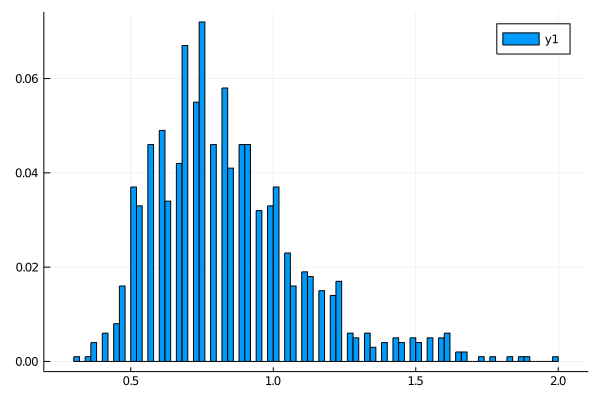

In [102]:
histogram(sqrt(1000).*ecdf_max_dist(Uniform(),1000,1000),bin=100,normalize = :probability,fmt=:png)
#plot!(x->pdf(Kolmogorov(),x),0.0,2.5,color=:red)

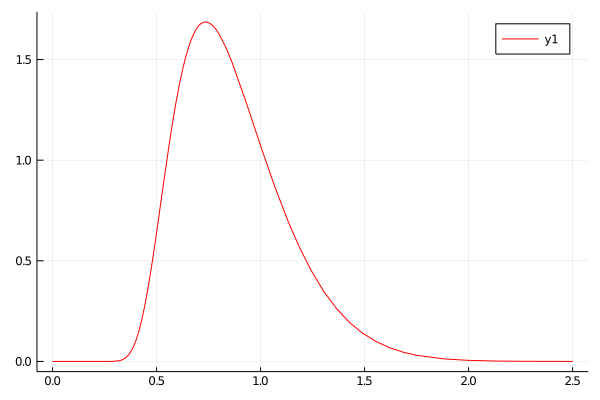

In [101]:
plot(x->pdf(Kolmogorov(),x),0.0,2.5,color=:red)